# 1. Correlation

Correlation is a measure of the linear relationship between two variables. It is a standardized measure of the covariance, which means that it is not affected by the scale of the variables.

$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$


We normalize the covariance by the standard deviation of the variables to get a measure that is not affected by the scale of the variables.

The correlation coefficient ranges from -1 to 1. A correlation coefficient of 1 indicates a perfect positive linear relationship, a correlation coefficient of -1 indicates a perfect negative linear relationship, and a correlation coefficient of 0 indicates no linear relationship.



Intuitively, the correlation between a varible and its negative is -1.

In [1]:
import numpy as np
vals = np.random.rand(1, 10)
correl = np.corrcoef(vals,vals)

print(correl[0,1])

print(np.corrcoef(vals,np.negative(vals))[0,1])

1.0
-1.0


## 1.1 Correlation does not imply causation

Correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other. There may be other factors that are causing both variables to move in the same way.

There are many examples of variables that are correlated but there is no causation. For example, the number of ice cream sales and the number of murders in a city are correlated, but it is not because one causes the other.

Two reasons why you get strong correlation without having causation either way:

1. There is an underlying third variable $Z$ that affects both variables. This is known as a **confounding variable**.
2. You just got lucky and two values happen to just have high correlation.


<Axes: xlabel='timestamp'>

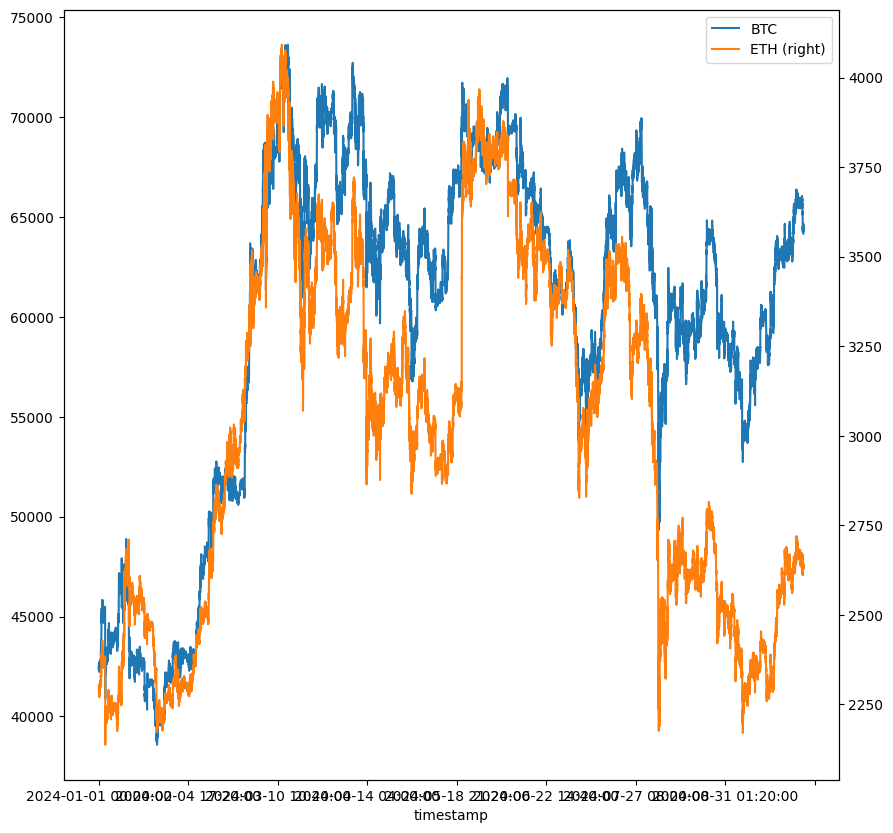

In [3]:
import pandas as pd
df_btc = pd.read_csv("data/BTC_USDT_5m.csv", sep=";")
df_eth = pd.read_csv("data/ETH_USDT_5m.csv", sep=";")

df_btc = df_btc.set_index("timestamp")
df_eth = df_eth.set_index("timestamp")

df_btc.head()


prices = pd.concat([df_btc["close"], df_eth["close"]], axis=1)
prices.columns = ["BTC", "ETH"]
prices.head()
prices = prices.dropna()

prices.plot(secondary_y="ETH", figsize=(10, 10))





In [7]:
prices.corr()

,BTC,ETH
BTC,1.000000,0.795148
ETH,0.795148,1.000000


As we can see, BTC and ETH are positively correlated.

These doesn't mean that BTC causes ETH or vice versa. It just means that the two variables move in the same direction.

Some other variables such as monetary policy, inflation, and other factors can cause both variables to move in the same direction.

## 1.2 Detrended correlation

A simple detrending concept is to fit a linear model (i.e. 
) and then subtract the model's predicted value from the actual value. 

This leaves over the residue, or error, of the model, and we compute the correlation of those. A strong correlation in that case is much more significant (although, still not a causation).



,BTC_detrended,ETH_detrended
BTC_detrended,1.000000,0.901952
ETH_detrended,0.901952,1.000000


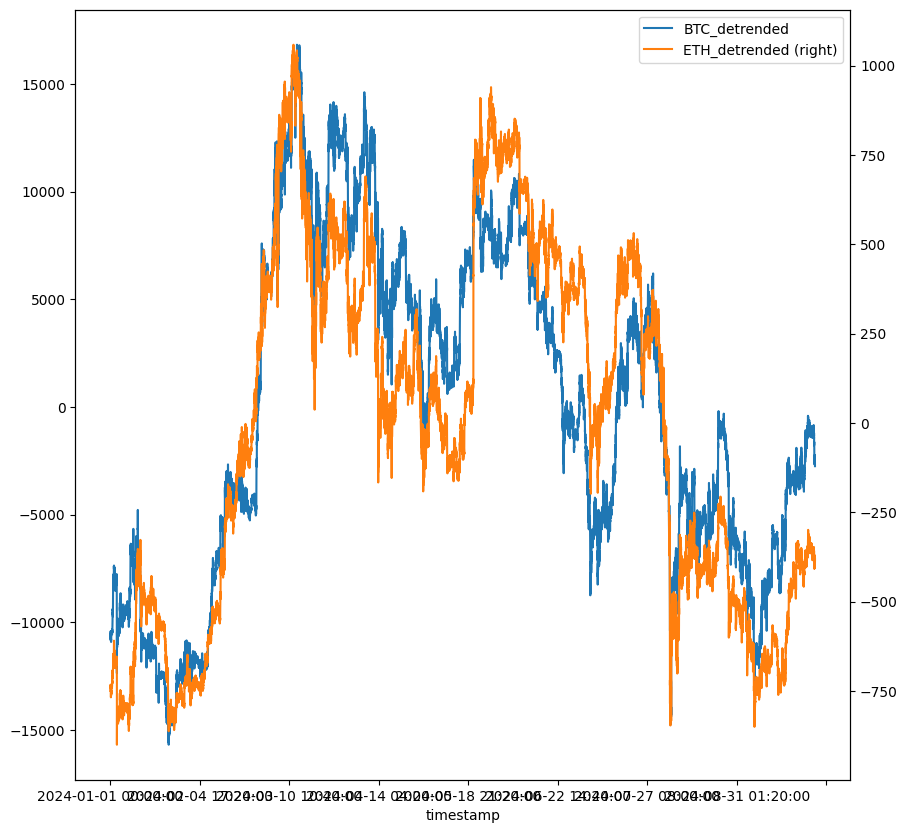

In [4]:
from scipy.signal import detrend

prices["BTC_detrended"] = detrend(prices["BTC"])
prices["ETH_detrended"] = detrend(prices["ETH"])

prices[["BTC_detrended", "ETH_detrended"]].plot(secondary_y="ETH_detrended", figsize=(10, 10))

prices[["BTC_detrended", "ETH_detrended"]].corr()





We can see that the correlation between the detrended BTC and ETH is even greater.